In [9]:
import os
import pickle

import cv2
from tqdm import tqdm
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [10]:
TRAIN_PREDICTIONS_FILENAME = "../runs/denset_v1/densenet_v1_train_predictions.pkl"
TRAIN_GROUD_TRUE = "../data/train/landmarks.csv"
NUM_IMAGES_TO_SHOW = 16
NUM_COLS = 4
NUM_ROWS = NUM_IMAGES_TO_SHOW // NUM_COLS + int(NUM_IMAGES_TO_SHOW % NUM_COLS != 0)

In [11]:
noisy_path = os.path.join('../data/train', 'noisy.txt')
with open(noisy_path, "rb") as fp:
    noisy_file = pickle.load(fp)

In [12]:
with open(TRAIN_PREDICTIONS_FILENAME, "rb") as fp:
    results = pickle.load(fp)
image_names = results["image_names"]
landmarks = results["landmarks"]

df = pd.read_csv(TRAIN_GROUD_TRUE, sep='\t')
df = df[~df['file_name'].isin(noisy_file)].set_index('file_name')


print("Images:", len(image_names))
print("Landmarks shape:", landmarks.shape)
print(f"Train Dataset: {len(df)}")

Images: 58359
Landmarks shape: (58359, 971, 2)
Train Dataset: 58359


In [13]:
def make_landmarks(row):
    landmark = row
    land_mark_len = landmark.shape[0]
    landmark = landmark.reshape(int(land_mark_len/2), 2)
    return landmark

In [14]:
def draw_landmarks(image, landmarks, ground_true):
    for point in ground_true:
        x, y = point.astype(int)
        cv2.circle(image, (x, y), 1, (0, 128, 0), 1, -1)
    for point in landmarks:
        x, y = point.astype(int)
        cv2.circle(image, (x, y), 1, (128, 0, 0), 1, -1)
    return image

In [15]:
ROW_NUM, COL_NUM = 5, 10

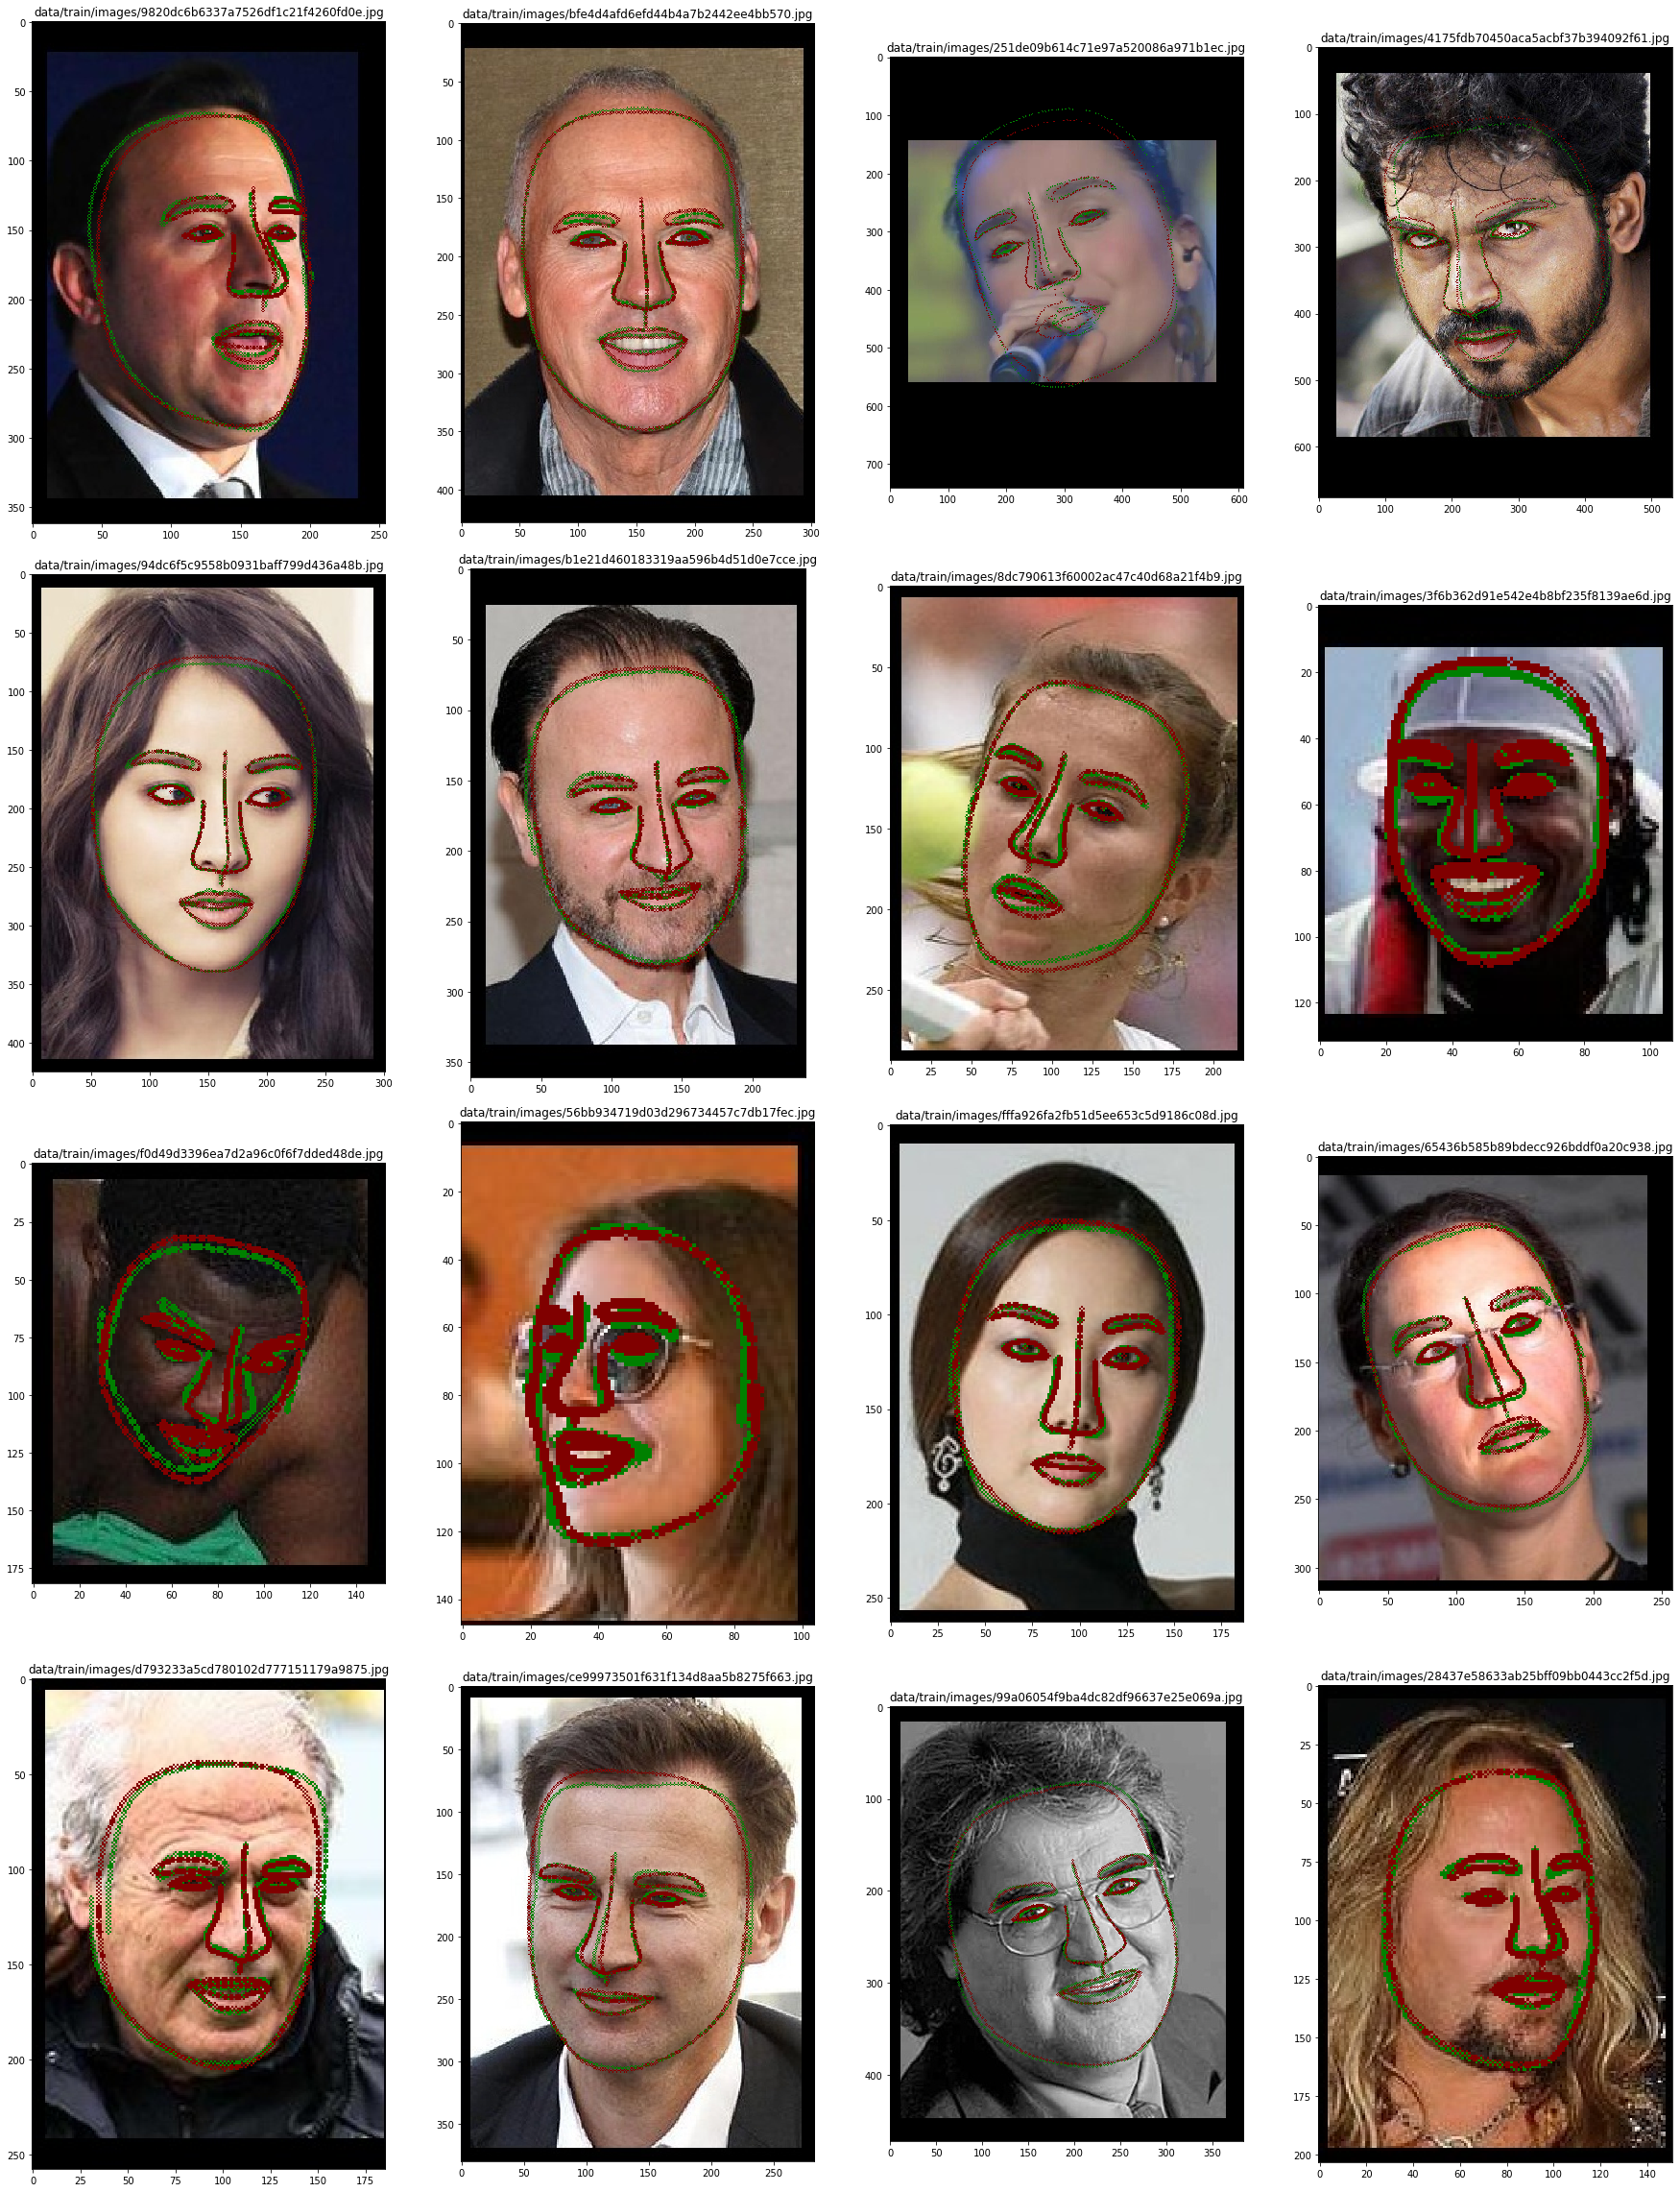

In [16]:
random_idxs = np.random.choice(len(image_names), size=min(NUM_IMAGES_TO_SHOW, len(image_names)), replace=False)

plt.figure(figsize=(25, NUM_ROWS * 8))
for i, idx in enumerate(random_idxs, 1):
    image = cv2.imread('../' + image_names[idx])
    image_name = image_names[idx].split('/')[-1]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = draw_landmarks(image, landmarks[idx], make_landmarks(df.loc[image_name].values))
    
    plt.subplot(NUM_ROWS, NUM_COLS, i)
    plt.imshow(image)
    plt.title(image_names[idx])
    
plt.tight_layout()
plt.show()